Table data: 
    Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Composition: 
 (1372, 5)

Confusion Matrix: 
 [[156   1]
 [  1 117]]


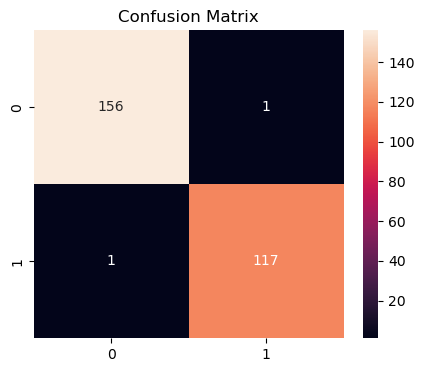


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.99      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [2]:
# Support Vector Machine algorithm 

# In this program we are working again with the bill authenticity data set 
# as in decision tree classifier, trying to identify if the bank note 
# is authentic or not certain features from wavelet transformed images of bills
# The feature include: variance, skewness, curtosis and entropy.
# variance refers to the statistical variance of the image
# skewness tells us how the data is shaped or distributed , could be
# positive (towards higher values), or negative (lower values)
# curtosis shows the shape of the distribution, how peaked or flat it is
# entropy: It quantifies the level of randomness or uncertainty in the data.
# The two classifier perform differently with the same the data set: 
# Svm is more accurate with an accueacy of 99% against 96%.
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC #import the Support Machine Classifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
#Loading Dataset
bill_df = pd.read_csv('bill_authentication.csv')
print("Table data: \n", bill_df.head())
print("\nComposition: \n", bill_df.shape)
#separating the input and target values the target from the input values, 
#inplace parameter changes the original data by removing the column
targetValues = bill_df.Class
bill_df.drop(['Class'], axis=1, inplace = True)
y = targetValues
X = bill_df
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                  test_size = 0.20, 
                                                  shuffle=True, 
                                                  random_state=1)
svm = SVC(kernel='linear').fit(x_train, y_train)
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix: \n", cm)
# Create a heatmap of the confusion matrix
plt.figure(figsize = (5, 4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:\n",classification_report(y_test,y_pred))